<a href="https://colab.research.google.com/github/Taiba-Naz/Baby-Monitoring-System/blob/main/baby_pose__Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q tflite-model-maker

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import the required packages.

In [ ]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

## Simple End-to-End Example

### Get the data path

Let's get some images to play with this simple end-to-end example. Hundreds of images is a good start for Model Maker while more data could achieve better accuracy.

In [ ]:
image_path = '/content/drive/MyDrive/train_bms_pose'

Step 1.   Load input data specific to an on-device ML app. Split it into training data and testing data.

In [ ]:
data = DataLoader.from_folder(image_path)
train_data, test_data = data.split(0.9)

INFO:tensorflow:Load image with size: 88, num_label: 2, labels: dangerous_pose, safe_pose.


Step 2. Customize the TensorFlow model.

In [ ]:
model = image_classifier.create(train_data,epochs=20)

INFO:tensorflow:Retraining the models...


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              3413024   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 2562      
Total params: 3,415,586
Trainable params: 2,562
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


2/2 [==============================] - 5s 59ms/step - loss: 0.8884 - accuracy: 0.5312
Epoch 2/20
2/2 [==============================] - 1s 384ms/step - loss: 0.7340 - accuracy: 0.5000
Epoch 3/20
2/2 [==============================] - 1s 355ms/step - loss: 0.6748 - accuracy: 0.6250
Epoch 4/20
2/2 [==============================] - 1s 295ms/step - loss: 0.6911 - accuracy: 0.6406
Epoch 5/20
2/2 [==============================] - 1s 228ms/step - loss: 0.5046 - accuracy: 0.8594
Epoch 6/20
2/2 [==============================] - 1s 729ms/step - loss: 0.4998 - accuracy: 0.7812
Epoch 7/20
2/2 [==============================] - 1s 843ms/step - loss: 0.4611 - accuracy: 0.7812
Epoch 8/20
2/2 [==============================] - 1s 354ms/step - loss: 0.4139 - accuracy: 0.8906
Epoch 9/20
2/2 [==============================] - 1s 307ms/step - loss: 0.4378 - accuracy: 0.8438
Epoch 10/20
2/2 [==============================] - 1s 217ms/step - loss: 0.3968 - accuracy: 0.8594
Epoch 11/20
2/2 [==============

Step 3. Evaluate the model.

In [ ]:
loss, accuracy = model.evaluate(test_data)

1/1 [==============================] - 1s 1s/step - loss: 0.5836 - accuracy: 0.6667


Step 4.  Export to TensorFlow Lite model.

Here, we export TensorFlow Lite model with [metadata](https://www.tensorflow.org/lite/convert/metadata) which provides a standard for model descriptions. The label file is embedded in metadata. The default post-training quantization technique is full interger quantization for the image classification task.

You could download it in the left sidebar same as the uploading part for your own use.

In [ ]:
model.export(export_dir='.')

INFO:tensorflow:Assets written to: /tmp/tmpcu65pnip/assets


INFO:tensorflow:Assets written to: /tmp/tmpcu65pnip/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpgwxf6_io/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmpgwxf6_io/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


After these simple 4 steps, we could further use TensorFlow Lite model file in on-device applications like in [image classification](https://github.com/tensorflow/examples/tree/master/lite/examples/image_classification) reference app.

## Detailed Process

Currently, we support several models such as  EfficientNet-Lite* models, MobileNetV2, ResNet50 as pre-trained models for image classification. But it is very flexible to add new pre-trained models to this library with just a few lines of code.


The following walks through this end-to-end example step by step to show more detail.

In [ ]:
image_path = '/content/drive/MyDrive/train_bms_pose_aug'

Use `DataLoader` class to load data.

As for `from_folder()` method, it could load data from the folder. It assumes that the image data of the same class are in the same subdirectory and the subfolder name is the class name. Currently, JPEG-encoded images and PNG-encoded images are supported.

In [ ]:
data = DataLoader.from_folder(image_path)

INFO:tensorflow:Load image with size: 2262, num_label: 2, labels: dangerous_pose_aug, safe_pose_aug.


INFO:tensorflow:Load image with size: 2262, num_label: 2, labels: dangerous_pose_aug, safe_pose_aug.


Split it to training data (80%), validation data (10%, optional) and testing data (10%).

In [ ]:
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

Show 25 image examples with labels.

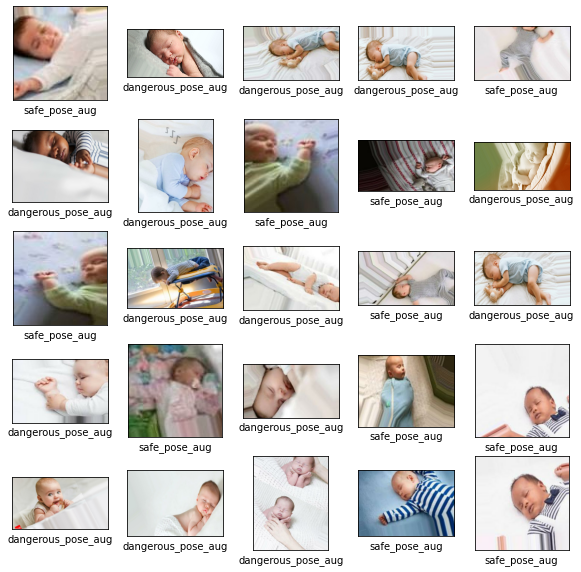

In [ ]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

### Step 2: Customize the TensorFlow Model

Create a custom image classifier model based on the loaded data. The default model is EfficientNet-Lite0.


In [ ]:
model = image_classifier.create(train_data, validation_data=validation_data, epochs=20)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_1 (HubK (None, 1280)              3413024   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 2562      
Total params: 3,415,586
Trainable params: 2,562
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


56/56 [==============================] - 299s 5s/step - loss: 0.4894 - accuracy: 0.7863 - val_loss: 0.3745 - val_accuracy: 0.8795
Epoch 2/20
56/56 [==============================] - 32s 573ms/step - loss: 0.3505 - accuracy: 0.9169 - val_loss: 0.3299 - val_accuracy: 0.9286
Epoch 3/20
56/56 [==============================] - 34s 612ms/step - loss: 0.3160 - accuracy: 0.9442 - val_loss: 0.3172 - val_accuracy: 0.9196
Epoch 4/20
56/56 [==============================] - 33s 598ms/step - loss: 0.3031 - accuracy: 0.9526 - val_loss: 0.3001 - val_accuracy: 0.9375
Epoch 5/20
56/56 [==============================] - 33s 594ms/step - loss: 0.3006 - accuracy: 0.9554 - val_loss: 0.2916 - val_accuracy: 0.9464
Epoch 6/20
56/56 [==============================] - 30s 544ms/step - loss: 0.2869 - accuracy: 0.9648 - val_loss: 0.2901 - val_accuracy: 0.9598
Epoch 7/20
56/56 [==============================] - 32s 582ms/step - loss: 0.2856 - accuracy: 0.9626 - val_loss: 0.2849 - val_accuracy: 0.9554
Epoch 8/20
5

Have a look at the detailed model structure.

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_1 (HubK (None, 1280)              3413024   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 2562      
Total params: 3,415,586
Trainable params: 2,562
Non-trainable params: 3,413,024
_________________________________________________________________


### Step 3: Evaluate the Customized Model

Evaluate the result of the model, get the loss and accuracy of the model.

In [ ]:
loss, accuracy = model.evaluate(test_data)

8/8 [==============================] - 36s 4s/step - loss: 0.2587 - accuracy: 0.9868


We could plot the predicted results in 100 test images. Predicted labels with red color are the wrong predicted results while others are correct.

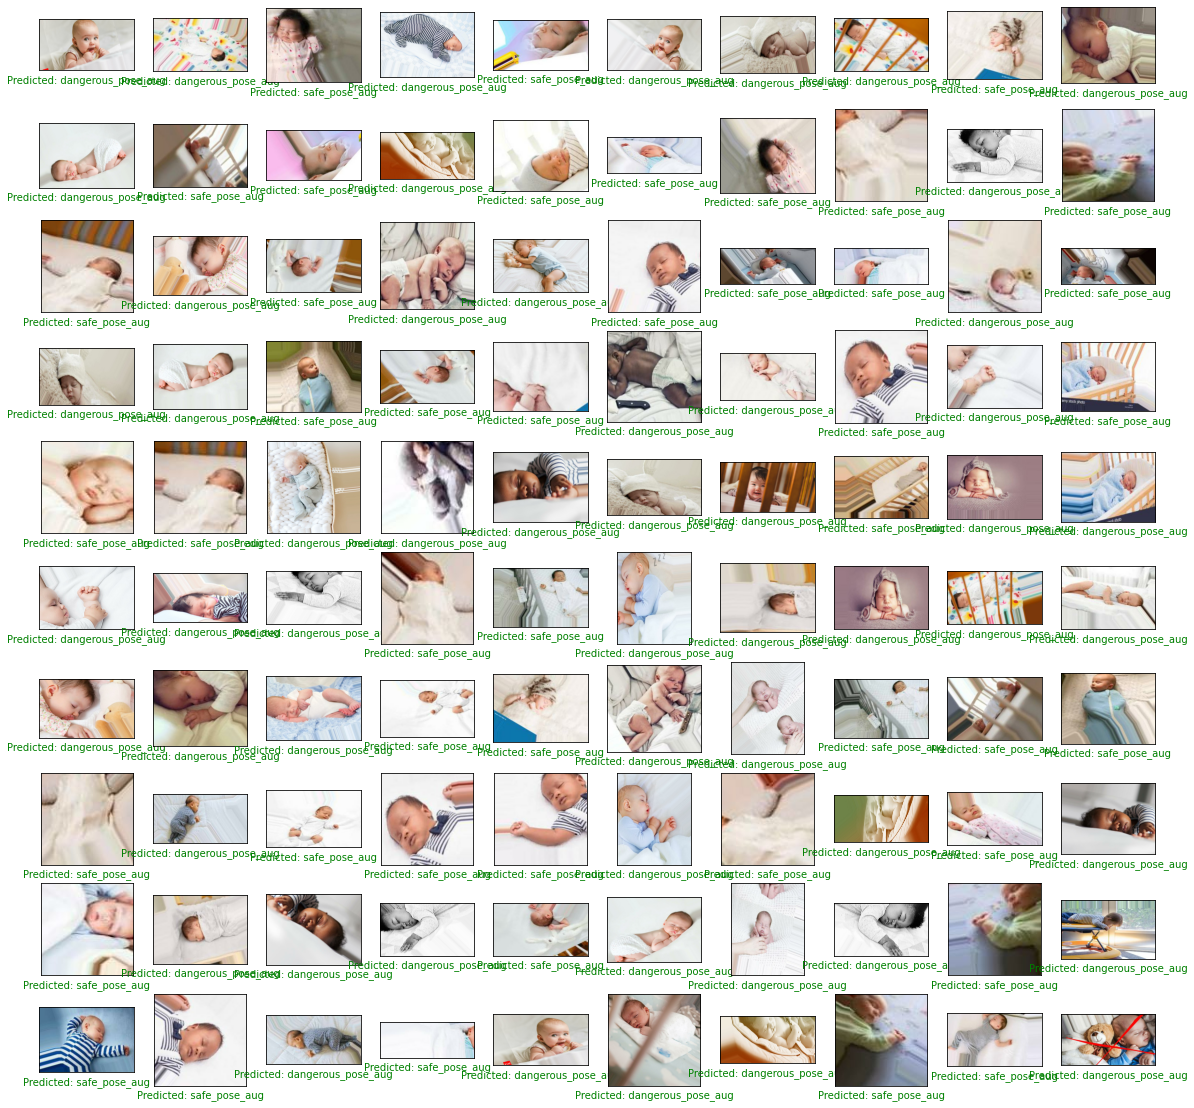

In [ ]:
# A helper function that returns 'red'/'green' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'green'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

If the accuracy doesn't meet the app requirement, one could refer to [Advanced Usage](#scrollTo=zNDBP2qA54aK) to explore alternatives such as changing to a larger model, adjusting re-training parameters etc.

### Step 4: Export to TensorFlow Lite Model

Convert the trained model to TensorFlow Lite model format with [metadata](https://www.tensorflow.org/lite/convert/metadata) so that you can later use in an on-device ML application. The label file and the vocab file are embedded in metadata. The default TFLite filename is `model.tflite`.

In many on-device ML application, the model size is an important factor. Therefore, it is recommended that you apply quantize the model to make it smaller and potentially run faster.
The default post-training quantization technique is full interger quantization for the image classification task.

In [ ]:
model.export(export_dir='model_1')

INFO:tensorflow:Assets written to: /tmp/tmpzd7179t9/assets


INFO:tensorflow:Assets written to: /tmp/tmpzd7179t9/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpx6ca8p61/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmpx6ca8p61/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: model_1/model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: model_1/model.tflite


See [example applications and guides of image classification](https://www.tensorflow.org/lite/models/image_classification/overview#example_applications_and_guides) for more details about how to integrate the TensorFlow Lite model into mobile apps.

This model can be integrated into an Android or an iOS app using the [ImageClassifier API](https://www.tensorflow.org/lite/inference_with_metadata/task_library/image_classifier) of the [TensorFlow Lite Task Library](https://www.tensorflow.org/lite/inference_with_metadata/task_library/overview).

The allowed export formats can be one or a list of the following:

*   `ExportFormat.TFLITE`
*   `ExportFormat.LABEL`
*   `ExportFormat.SAVED_MODEL`

By default, it just exports TensorFlow Lite model with metadata. You can also selectively export different files. For instance, exporting only the label file as follows:

In [ ]:
model.export(export_dir='tensorflowlite_mdel', export_format=ExportFormat.LABEL)

INFO:tensorflow:Saving labels in tensorflowlite_mdel/labels.txt


INFO:tensorflow:Saving labels in tensorflowlite_mdel/labels.txt


You can also evaluate the tflite model with the `evaluate_tflite` method.

In [ ]:
model.evaluate_tflite('model.tflite', test_data)

{'accuracy': 0.9030837004405287}

## Advanced Usage

The `create` function is the critical part of this library. It uses transfer learning with a pretrained model similar to the [tutorial](https://www.tensorflow.org/tutorials/images/transfer_learning).

The `create` function contains the following steps:

1.   Split the data into training, validation, testing data according to parameter `validation_ratio` and `test_ratio`. The default value of `validation_ratio` and `test_ratio` are `0.1` and `0.1`.
2.   Download a [Image Feature Vector](https://www.tensorflow.org/hub/common_signatures/images#image_feature_vector) as the base model from TensorFlow Hub. The default pre-trained model is  EfficientNet-Lite0.
3.   Add a classifier head with a Dropout Layer with `dropout_rate` between head layer and pre-trained model. The default `dropout_rate` is the default `dropout_rate` value from [make_image_classifier_lib](https://github.com/tensorflow/hub/blob/master/tensorflow_hub/tools/make_image_classifier/make_image_classifier_lib.py#L55) by TensorFlow Hub.
4.   Preprocess the raw input data. Currently, preprocessing steps including normalizing the value of each image pixel to model input scale and resizing it to model input size.   EfficientNet-Lite0 have the input scale `[0, 1]` and the input image size `[224, 224, 3]`.
5.   Feed the data into the classifier model. By default, the training parameters such as training epochs, batch size, learning rate, momentum are the default values from [make_image_classifier_lib](https://github.com/tensorflow/hub/blob/master/tensorflow_hub/tools/make_image_classifier/make_image_classifier_lib.py#L55) by TensorFlow Hub. Only the classifier head is trained.


In this section, we describe several advanced topics, including switching to a different image classification model, changing the training hyperparameters etc.


## Customize Post-training quantization on the TensorFLow Lite model


[Post-training quantization](https://www.tensorflow.org/lite/performance/post_training_quantization) is a conversion technique that can reduce model size and inference latency, while also improving CPU and hardware accelerator inference speed, with a little degradation in model accuracy. Thus, it's widely used to optimize the model.


Model Maker library applies a default post-training quantization techique when exporting the model. If you want to customize post-training quantization, Model Maker supports multiple post-training quantization options using [QuantizationConfig](https://www.tensorflow.org/lite/api_docs/python/tflite_model_maker/config/QuantizationConfig) as well. Let's take float16 quantization as an instance. First, define the quantization config.

In [ ]:
config = QuantizationConfig.for_float16()

Then we export the TensorFlow Lite model with such configuration.

In [ ]:
model.export(export_dir='.', tflite_filename='model_fp16.tflite', quantization_config=config)

INFO:tensorflow:Assets written to: /tmp/tmpw_hq_7_m/assets


INFO:tensorflow:Assets written to: /tmp/tmpw_hq_7_m/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpw5mql6yu/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmpw5mql6yu/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model_fp16.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model_fp16.tflite


In Colab, you can download the model named `model_fp16.tflite` from the left sidebar, same as the uploading part mentioned above.

## Change the model


### Change to the model that's supported in this library.

This library supports  EfficientNet-Lite models, MobileNetV2, ResNet50 by now. [EfficientNet-Lite](https://github.com/tensorflow/tpu/tree/master/models/official/efficientnet/lite) are a family of image classification models that could achieve state-of-art accuracy and suitable for Edge devices. The default model is EfficientNet-Lite0.

We could switch model to MobileNetV2 by just setting parameter `model_spec` to the MobileNetV2 model specification in `create` method.

In [ ]:
model = image_classifier.create(train_data, model_spec=model_spec.get('mobilenet_v2'), validation_data=validation_data,epochs=10)


INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_2 (HubK (None, 1280)              2257984   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________
None
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


56/56 [==============================] - 37s 607ms/step - loss: 0.5039 - accuracy: 0.8047 - val_loss: 0.3409 - val_accuracy: 0.9152
Epoch 2/10
56/56 [==============================] - 34s 614ms/step - loss: 0.3452 - accuracy: 0.9169 - val_loss: 0.3073 - val_accuracy: 0.9330
Epoch 3/10
56/56 [==============================] - 34s 619ms/step - loss: 0.3154 - accuracy: 0.9448 - val_loss: 0.3063 - val_accuracy: 0.9375
Epoch 4/10
56/56 [==============================] - 34s 620ms/step - loss: 0.2940 - accuracy: 0.9498 - val_loss: 0.2916 - val_accuracy: 0.9554
Epoch 5/10
56/56 [==============================] - 32s 575ms/step - loss: 0.2880 - accuracy: 0.9593 - val_loss: 0.2816 - val_accuracy: 0.9598
Epoch 6/10
56/56 [==============================] - 31s 570ms/step - loss: 0.2867 - accuracy: 0.9604 - val_loss: 0.2752 - val_accuracy: 0.9732
Epoch 7/10
56/56 [==============================] - 30s 553ms/step - loss: 0.2859 - accuracy: 0.9632 - val_loss: 0.2788 - val_accuracy: 0.9643
Epoch 8/10

Evaluate the newly retrained MobileNetV2 model to see the accuracy and loss in testing data.

In [ ]:
loss, accuracy = model.evaluate(test_data)

8/8 [==============================] - 7s 322ms/step - loss: 0.2712 - accuracy: 0.9780


### Change to the model in TensorFlow Hub

Moreover, we could also switch to other new models that inputs an image and outputs a feature vector with TensorFlow Hub format.

As [Inception V3](https://tfhub.dev/google/imagenet/inception_v3/feature_vector/1) model as an example, we could define `inception_v3_spec` which is an object of [image_classifier.ModelSpec](https://www.tensorflow.org/lite/api_docs/python/tflite_model_maker/image_classifier/ModelSpec) and contains the specification of the Inception V3 model.

We need to specify the model name `name`, the url of the TensorFlow Hub model `uri`. Meanwhile, the default value of `input_image_shape` is `[224, 224]`. We need to change it to `[299, 299]` for Inception V3 model.

In [ ]:
inception_v3_spec = image_classifier.ModelSpec(
    uri='https://tfhub.dev/google/imagenet/inception_v3/feature_vector/1')
inception_v3_spec.input_image_shape = [299, 299]

Then, by setting parameter `model_spec` to `inception_v3_spec` in `create` method, we could retrain the Inception V3 model.

The remaining steps are exactly same and we could get a customized InceptionV3 TensorFlow Lite model in the end.

### Change your own custom model

If we'd like to use the custom model that's not in TensorFlow Hub, we should create and export [ModelSpec](https://www.tensorflow.org/hub/api_docs/python/hub/ModuleSpec) in TensorFlow Hub.

Then start to define `ModelSpec` object like the process above.

## Change the training hyperparameters
We could also change the training hyperparameters like `epochs`, `dropout_rate` and `batch_size` that could affect the model accuracy. The model parameters you can adjust are:


*   `epochs`: more epochs could achieve better accuracy until it converges but training for too many epochs may lead to overfitting.
*   `dropout_rate`: The rate for dropout, avoid overfitting. None by default.
*   `batch_size`: number of samples to use in one training step.  None by default.
*   `validation_data`: Validation data. If None, skips validation process. None by default.
*   `train_whole_model`: If true, the Hub module is trained together with the classification layer on top. Otherwise, only train the top classification layer. None by default.
*   `learning_rate`: Base learning rate. None by default.
*   `momentum`: a Python float forwarded to the optimizer. Only used when
      `use_hub_library` is True. None by default.
*   `shuffle`: Boolean, whether the data should be shuffled. False by default.
*   `use_augmentation`: Boolean, use data augmentation for preprocessing. False by default.
*   `use_hub_library`: Boolean, use `make_image_classifier_lib` from tensorflow hub to retrain the model. This training pipeline could achieve better performance for complicated dataset with many categories. True by default. 
*   `warmup_steps`: Number of warmup steps for warmup schedule on learning rate. If None, the default warmup_steps is used which is the total training steps in two epochs. Only used when `use_hub_library` is False. None by default.
*   `model_dir`: Optional, the location of the model checkpoint files. Only used when `use_hub_library` is False. None by default.

Parameters which are None by default like `epochs` will get the concrete default parameters in [make_image_classifier_lib](https://github.com/tensorflow/hub/blob/02ab9b7d3455e99e97abecf43c5d598a5528e20c/tensorflow_hub/tools/make_image_classifier/make_image_classifier_lib.py#L54) from TensorFlow Hub library or  [train_image_classifier_lib](https://github.com/tensorflow/examples/blob/f0260433d133fd3cea4a920d1e53ecda07163aee/tensorflow_examples/lite/model_maker/core/task/train_image_classifier_lib.py#L61).

For example, we could train with more epochs.


In [ ]:
model = image_classifier.create(train_data, validation_data=validation_data, epochs=10)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_3 (HubK (None, 1280)              3413024   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 2562      
Total params: 3,415,586
Trainable params: 2,562
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


56/56 [==============================] - 36s 600ms/step - loss: 0.4936 - accuracy: 0.7885 - val_loss: 0.3705 - val_accuracy: 0.9241
Epoch 2/10
56/56 [==============================] - 35s 629ms/step - loss: 0.3511 - accuracy: 0.9169 - val_loss: 0.3309 - val_accuracy: 0.9375
Epoch 3/10
56/56 [==============================] - 32s 584ms/step - loss: 0.3195 - accuracy: 0.9364 - val_loss: 0.3089 - val_accuracy: 0.9420
Epoch 4/10
56/56 [==============================] - 35s 635ms/step - loss: 0.3055 - accuracy: 0.9481 - val_loss: 0.2998 - val_accuracy: 0.9375
Epoch 5/10
56/56 [==============================] - 31s 560ms/step - loss: 0.2933 - accuracy: 0.9598 - val_loss: 0.2940 - val_accuracy: 0.9420
Epoch 6/10
56/56 [==============================] - 32s 589ms/step - loss: 0.2857 - accuracy: 0.9609 - val_loss: 0.2867 - val_accuracy: 0.9554
Epoch 7/10
56/56 [==============================] - 30s 547ms/step - loss: 0.2872 - accuracy: 0.9648 - val_loss: 0.2829 - val_accuracy: 0.9598
Epoch 8/10

Evaluate the newly retrained model with 10 training epochs.

In [ ]:
loss, accuracy = model.evaluate(test_data)

8/8 [==============================] - 6s 271ms/step - loss: 0.2578 - accuracy: 0.9824
